# H2O Sparkling Water Tutorial : Chicago Crime Dataset

### Step 1. Define Spark Context


In [3]:
sc

<SparkContext master=local[*] appName=PySparkShell>

### Create an H2O cluster inside the Spark cluster and import H2O-Python package

In [7]:
from pysparkling import *
hc = H2OContext.getOrCreate(spark)
import h2o

Method getOrCreate with spark argument is deprecated. Please use either just getOrCreate() or if you need to pass extra H2OConf, use getOrCreate(conf). The spark argument will be removed in release 3.32.


Connecting to H2O server at http://172.29.157.231:54321 ... successful.


H2O_cluster_uptime:,12 secs
H2O_cluster_timezone:,America/Vancouver
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,6 days
H2O_cluster_name:,sparkling-water-jim_local-1591583533585
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,878 Mb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"



Sparkling Water Context:
 * Sparkling Water Version: 3.30.0.4-1-2.4
 * H2O name: sparkling-water-jim_local-1591583533585
 * cluster size: 1
 * list of used nodes:
  (executorId, host, port)
  ------------------------
  (0,172.29.157.231,54321)
  ------------------------

  Open H2O Flow in browser: http://172.29.157.231:54324 (CMD + click in Mac OSX)

    


### Parse Chicago Crime dataset into H2O

In [43]:
column_type = ['Numeric','String','String','Enum','Enum','Enum','Enum','Enum','Enum','Enum','Numeric','Numeric','Numeric','Numeric','Enum','Numeric','Numeric','Numeric','Enum','Numeric','Numeric','Enum']
f_crimes = h2o.import_file(path="https://raw.githubusercontent.com/h2oai/h2o-tutorials/master/tutorials/data/chicagoCrimes10k.csv",col_types = [c.lower() for c in column_type]) #Fixed bug in original tutoriAL

print(f_crimes.shape)
f_crimes.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%
(9999, 22)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
type,int,string,string,enum,enum,enum,enum,enum,enum,enum,int,int,int,int,enum,int,int,int,enum,real,real,enum
mins,21735.0,NaN,NaN,,,,,,,,111.0,1.0,1.0,1.0,,1100317.0,1814255.0,2015.0,,41.64507243,-87.906463888,
mean,9931318.737373699,NaN,NaN,,,,,,,,1159.6180618061765,11.348988512757918,22.954095409541008,37.447644764476536,,1163880.5981498407,1885916.1498424308,2015.0,,41.842565224673535,-87.67414052209605,
maxs,9962898.0,NaN,NaN,,,,,,,,2535.0,25.0,50.0,77.0,,1205069.0,1951533.0,2015.0,,42.022646183,-87.524773286,
sigma,396787.5642214295,NaN,NaN,,,,,,,,695.7602987498396,6.945474933012859,13.649566114361296,21.274876222320856,,16496.449368147238,31274.01631985589,0.0,,0.08601865793584827,0.06003579706529783,
zeros,0,0,0,,,,,,,,0,0,0,0,,0,0,0,,0,0,
missing,0,0,0,0,0,0,0,6,0,0,0,162,0,0,0,162,162,0,0,162,162,162
0,9955810.0,HY144797,02/08/2015 11:43:40 PM,081XX S COLES AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,true,false,422.0,4.0,7.0,46.0,18,1198273.0,1851626.0,2015.0,02/15/2015 12:43:39 PM,41.747693646,-87.549035389,"(41.747693646, -87.549035389)"
1,9955861.0,HY144838,02/08/2015 11:41:42 PM,118XX S STATE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,true,true,522.0,5.0,34.0,53.0,08B,1178335.0,1826581.0,2015.0,02/15/2015 12:43:39 PM,41.679442289,-87.622850758,"(41.679442289, -87.622850758)"
2,9955801.0,HY144779,02/08/2015 11:30:22 PM,002XX S LARAMIE AVE,2026,NARCOTICS,POSS: PCP,SIDEWALK,true,false,1522.0,15.0,29.0,25.0,18,1141717.0,1898581.0,2015.0,02/15/2015 12:43:39 PM,41.87777333,-87.755117993,"(41.87777333, -87.755117993)"


 Look at the distribution of IUCR and Arrest columns


In [48]:
print(f_crimes["IUCR"].table())
print(f_crimes["Arrest"].table())

IUCR,Count
0110,16
0261,2
0263,2
0265,5
0266,2
0281,41
0291,3
0312,18
0313,20
031A,136


Arrest,Count
false,7071
true,2928


#### Modify column names to replace blank spaces with underscore


In [50]:
col_names = list(map(lambda s: s.replace(' ', '_'), f_crimes.col_names)) #Corrected bug in original docs
f_crimes.set_names(col_names)

ID,Case_Number,Date,Block,IUCR,Primary_Type,Description,Location_Description,Arrest,Domestic,Beat,District,Ward,Community_Area,FBI_Code,X_Coordinate,Y_Coordinate,Year,Updated_On,Latitude,Longitude,Location
9.95581e+06,HY144797,02/08/2015 11:43:40 PM,081XX S COLES AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,true,false,422,4,7,46,18,1.19827e+06,1.85163e+06,2015,02/15/2015 12:43:39 PM,41.7477,-87.549,"(41.747693646, -87.549035389)"
9.95586e+06,HY144838,02/08/2015 11:41:42 PM,118XX S STATE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,true,true,522,5,34,53,08B,1.17834e+06,1.82658e+06,2015,02/15/2015 12:43:39 PM,41.6794,-87.6229,"(41.679442289, -87.622850758)"
9.9558e+06,HY144779,02/08/2015 11:30:22 PM,002XX S LARAMIE AVE,2026,NARCOTICS,POSS: PCP,SIDEWALK,true,false,1522,15,29,25,18,1.14172e+06,1.89858e+06,2015,02/15/2015 12:43:39 PM,41.8778,-87.7551,"(41.87777333, -87.755117993)"
9.9562e+06,HY144787,02/08/2015 11:30:23 PM,006XX E 67TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,true,false,321,nan,6,42,18,nan,nan,2015,02/15/2015 12:43:39 PM,nan,nan,
9.95585e+06,HY144829,02/08/2015 11:30:58 PM,0000X S MAYFIELD AVE,0610,BURGLARY,FORCIBLE ENTRY,APARTMENT,false,false,1513,15,29,25,05,1.13724e+06,1.89937e+06,2015,02/15/2015 12:43:39 PM,41.88,-87.7715,"(41.880025548, -87.771541324)"
9.95584e+06,HY144778,02/08/2015 11:30:21 PM,010XX W 48TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,false,true,933,9,3,61,08B,1.16999e+06,1.87302e+06,2015,02/15/2015 12:43:39 PM,41.8071,-87.6521,"(41.807059405, -87.65206589)"
9.95587e+06,HY144822,02/08/2015 11:27:24 PM,015XX W ARTHUR AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,false,false,2432,24,40,1,14,1.16473e+06,1.94322e+06,2015,02/15/2015 12:43:39 PM,41.9998,-87.6693,"(41.999814056, -87.669342967)"
21752,HY144738,02/08/2015 11:26:12 PM,060XX W GRAND AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,true,false,2512,25,37,19,01A,1.13591e+06,1.91421e+06,2015,02/15/2015 12:43:39 PM,41.9208,-87.7761,"(41.920755683, -87.776067514)"
9.95581e+06,HY144775,02/08/2015 11:20:33 PM,001XX W WACKER DR,0460,BATTERY,SIMPLE,OTHER,false,false,122,1,42,32,08B,1.17538e+06,1.90209e+06,2015,02/15/2015 12:43:39 PM,41.8867,-87.6314,"(41.886707818, -87.631396356)"
9.95828e+06,HY146732,02/08/2015 11:15:36 PM,001XX W WACKER DR,0460,BATTERY,SIMPLE,HOTEL/MOTEL,false,false,122,1,42,32,08B,1.17538e+06,1.90209e+06,2015,02/15/2015 12:43:39 PM,41.8867,-87.6314,"(41.886707818, -87.631396356)"


#### date manipulation wwith respect to TImezone 

In [51]:
h2o.set_timezone("Etc/UTC")

## Refine date column 
def refine_date_col(data, col, pattern):
    data[col]         = data[col].as_date(pattern)
    data["Day"]       = data[col].day()
    data["Month"]     = data[col].month()    # Since H2O indexes from 0
    data["Year"]      = data[col].year()
    data["WeekNum"]   = data[col].week()
    data["WeekDay"]   = data[col].dayOfWeek()
    data["HourOfDay"] = data[col].hour()
    
    # Create weekend and season cols
    data["Weekend"] = (data["WeekDay"] == "Sun" or data["WeekDay"] == "Sat").ifelse(1, 0)[0]
    data["Season"] = data["Month"].cut([0, 2, 5, 7, 10, 12], ["Winter", "Spring", "Summer", "Autumn", "Winter"])
    
refine_date_col(f_crimes, "Date", "%m/%d/%Y %I:%M:%S %p")
f_crimes = f_crimes.drop("Date")

Deprecated, set ``h2o.cluster().timezone`` instead.


In [ ]:
### Parse Census data into the  H2O frame and update the column names in the table


In [52]:
f_census = h2o.import_file("https://raw.githubusercontent.com/h2oai/h2o-tutorials/master/tutorials/data/chicagoCensus.csv",header=1)
## Update column names in the table
col_names = list(map(lambda s: s.strip().replace(' ', '_'), f_census.col_names))
f_census.set_names(col_names)
f_census = f_census[1:78,:]
print("H2O frame dimensions : {}".format(f_census.dim))
f_census.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%
H2O frame dimensions : [77, 9]


,Community_Area_Number,COMMUNITY_AREA_NAME,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16+_UNEMPLOYED,PERCENT_AGED_25+_WITHOUT_HIGH_SCHOOL_DIPLOMA,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX
type,int,string,real,real,real,real,real,int,int
mins,2.0,NaN,0.3,3.3,4.7,2.5,13.5,8201.0,1.0
mean,39.5,NaN,4.884415584415585,21.715584415584413,15.427272727272728,20.358441558441562,35.82467532467533,25618.532467532474,49.644736842105274
maxs,77.0,NaN,15.8,56.5,35.9,54.8,51.5,88669.0,98.0
sigma,22.08317610006918,NaN,3.668968912058082,11.530361122466665,7.509636552345617,11.820982133136585,7.270545404940688,15294.857417983078,28.85536527689708
zeros,0,0,0,0,0,0,0,0,0
missing,1,0,0,0,0,0,0,0,1
0,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040.0,46.0
1,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787.0,20.0
2,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524.0,17.0


### Parse Weather data into H2O


In [53]:
f_weather = h2o.import_file("https://raw.githubusercontent.com/h2oai/h2o-tutorials/master/tutorials/data/chicagoAllWeather.csv")
f_weather = f_weather[1:]
print("H2O frame dimensions : {}".format(f_weather.dim))
f_weather.summary()

Parse progress: |█████████████████████████████████████████████████████████| 100%
H2O frame dimensions : [5162, 6]


,month,day,year,maxTemp,meanTemp,minTemp
type,int,int,int,int,int,int
mins,1.0,1.0,2001.0,-2.0,-9.0,-18.0
mean,6.474428516079037,15.708252615265401,2007.5714839209636,58.871042920955524,50.31035152456787,41.481258496795505
maxs,12.0,31.0,2015.0,103.0,93.0,82.0
sigma,3.4690517169376918,8.798951739966588,4.077340905698786,21.48297772368538,19.930239926608895,19.020729712312264
zeros,0,0,0,0,2,16
missing,0,0,0,13,13,13
0,1.0,1.0,2001.0,23.0,14.0,6.0
1,1.0,2.0,2001.0,18.0,12.0,6.0
2,1.0,3.0,2001.0,28.0,18.0,8.0


#### Are there any null entries ?

In [54]:
f_weather[f_weather["meanTemp"].isna()]

month,day,year,maxTemp,meanTemp,minTemp
6,19,2008,nan,nan,nan
9,23,2008,nan,nan,nan
9,24,2008,nan,nan,nan
9,25,2008,nan,nan,nan
9,26,2008,nan,nan,nan
9,27,2008,nan,nan,nan
9,28,2008,nan,nan,nan
9,29,2008,nan,nan,nan
9,30,2008,nan,nan,nan
3,4,2009,nan,nan,nan


## Now we shall convert the H2O frames to spark dataframes

In [58]:
# Copy data frames to Spark from H2O
df_weather = hc.asSparkFrame(f_weather,) #Fixed bugs in original docs
df_census = hc.asSparkFrame(f_census)
df_crimes = hc.asSparkFrame(f_crimes)
# Look at the weather data as parsed in Spark
df_weather.show(3)

+-----+---+----+-------+--------+-------+
|month|day|year|maxTemp|meanTemp|minTemp|
+-----+---+----+-------+--------+-------+
|    1|  1|2001|     23|      14|      6|
|    1|  2|2001|     18|      12|      6|
|    1|  3|2001|     28|      18|      8|
+-----+---+----+-------+--------+-------+
only showing top 3 rows



## Next, We shall join all three dataframes in Spark
### We will convert the dataframes to temp tables in an SQL context and then use a SQL script to perform the joins

In [62]:
sqlContext.registerDataFrameAsTable(df_weather, "chicagoWeather")
sqlContext.registerDataFrameAsTable(df_census, "chicagoCensus")
sqlContext.registerDataFrameAsTable(df_crimes, "chicagoCrime")


crimeWithWeather = sqlContext.sql("""SELECT
a.Year, a.Month, a.Day, a.WeekNum, a.HourOfDay, a.Weekend, a.Season, a.WeekDay,
a.IUCR, a.Primary_Type, a.Location_Description, a.Community_Area, a.District,
a.Arrest, a.Domestic, a.Beat, a.Ward, a.FBI_Code,
b.minTemp, b.maxTemp, b.meanTemp,
c.PERCENT_AGED_UNDER_18_OR_OVER_64, c.PER_CAPITA_INCOME, c.HARDSHIP_INDEX,
c.PERCENT_OF_HOUSING_CROWDED, c.PERCENT_HOUSEHOLDS_BELOW_POVERTY,
c.`PERCENT_AGED_16+_UNEMPLOYED`, c.`PERCENT_AGED_25+_WITHOUT_HIGH_SCHOOL_DIPLOMA`
FROM chicagoCrime a
JOIN chicagoWeather b
ON a.Year = b.year AND a.Month = b.month AND a.Day = b.day
JOIN chicagoCensus c
ON a.Community_Area = c.Community_Area_Number""")   #Fixed several bugs
# Print the crimeWithWeather data table from Spark
crimeWithWeather.show(2)

+----+-----+---+-------+---------+-------+------+-------+----+-----------------+--------------------+--------------+--------+------+--------+----+----+--------+-------+-------+--------+--------------------------------+-----------------+--------------+--------------------------+--------------------------------+---------------------------+--------------------------------------------+
|Year|Month|Day|WeekNum|HourOfDay|Weekend|Season|WeekDay|IUCR|     Primary_Type|Location_Description|Community_Area|District|Arrest|Domestic|Beat|Ward|FBI_Code|minTemp|maxTemp|meanTemp|PERCENT_AGED_UNDER_18_OR_OVER_64|PER_CAPITA_INCOME|HARDSHIP_INDEX|PERCENT_OF_HOUSING_CROWDED|PERCENT_HOUSEHOLDS_BELOW_POVERTY|PERCENT_AGED_16+_UNEMPLOYED|PERCENT_AGED_25+_WITHOUT_HIGH_SCHOOL_DIPLOMA|
+----+-----+---+-------+---------+-------+------+-------+----+-----------------+--------------------+--------------+--------+------+--------+----+----+--------+-------+-------+--------+--------------------------------+------------

#### COnvert the joined df back to H2O frame

In [67]:
#Copy table from Spark to H2O
hc.as_h2o_frame?
crimeWithWeatherHF = hc.asH2OFrame(crimeWithWeather)
crimeWithWeatherHF.summary()

Object `hc.as_h2o_frame` not found.


,Year,Month,Day,WeekNum,HourOfDay,Weekend,Season,WeekDay,IUCR,Primary_Type,Location_Description,Community_Area,District,Arrest,Domestic,Beat,Ward,FBI_Code,minTemp,maxTemp,meanTemp,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16+_UNEMPLOYED,PERCENT_AGED_25+_WITHOUT_HIGH_SCHOOL_DIPLOMA
type,int,int,int,int,int,int,enum,enum,enum,enum,enum,int,int,enum,enum,int,int,enum,int,int,int,real,int,int,real,real,real,real
mins,2015.0,1.0,1.0,4.0,0.0,0.0,,,,,,2.0,1.0,,,111.0,1.0,,-2.0,15.0,7.0,13.5,8201.0,1.0,0.3,3.3,4.7,2.5
mean,2015.0,1.4190698619008937,17.69181559707555,5.1802396425670185,13.629874086108854,0.15922014622258326,,,,,,38.00649878147847,11.159719356170037,,,1140.1922217709177,22.578493095044678,,17.694557270511773,31.709382615759544,24.932676685621445,35.17558895207148,25240.96740454915,54.715982940698616,5.4023761169780675,24.616094638505277,16.953472786352563,21.141054021121036
maxs,2015.0,2.0,31.0,6.0,23.0,1.0,,,,,,77.0,25.0,,,2535.0,50.0,,29.0,43.0,36.0,51.5,88669.0,98.0,15.8,56.5,35.9,54.8
sigma,0.0,0.4934318960555647,11.179588951900435,0.738960225816682,6.472460749289908,0.3658998307880325,,,,,,20.949410220170048,6.821354676605517,,,683.0185323548574,13.403273590839731,,8.967467851398052,6.940258151373644,7.46762665214585,7.961621737751797,18146.902470307054,29.48554286718414,3.7710043340338393,10.221783713866362,7.579665390555998,11.468162099376295
zeros,0,0,0,0,366,8280,,,,,,0,0,,,0,0,,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,6,0,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2015.0,1.0,23.0,4.0,22.0,0.0,Winter,Fri,143A,WEAPONS VIOLATION,ALLEY,31.0,12.0,true,false,1234.0,25.0,15,29.0,31.0,30.0,32.6,16444.0,76.0,9.6,25.8,15.8,40.7
1,2015.0,1.0,23.0,4.0,19.0,0.0,Winter,Fri,4625,OTHER OFFENSE,SIDEWALK,31.0,10.0,true,false,1034.0,25.0,26,29.0,31.0,30.0,32.6,16444.0,76.0,9.6,25.8,15.8,40.7
2,2015.0,1.0,23.0,4.0,19.0,0.0,Winter,Fri,0320,ROBBERY,SMALL RETAIL STORE,31.0,10.0,false,false,1034.0,25.0,03,29.0,31.0,30.0,32.6,16444.0,76.0,9.6,25.8,15.8,40.7


#### Assign column types to the CrimeWeatherHF data table in H2O


In [68]:
crimeWithWeatherHF["Season"]= crimeWithWeatherHF["Season"].asfactor()
crimeWithWeatherHF["WeekDay"]= crimeWithWeatherHF["WeekDay"].asfactor()
crimeWithWeatherHF["IUCR"]= crimeWithWeatherHF["IUCR"].asfactor()
crimeWithWeatherHF["Primary_Type"]= crimeWithWeatherHF["Primary_Type"].asfactor()
crimeWithWeatherHF["Location_Description"]= crimeWithWeatherHF["Location_Description"].asfactor()
crimeWithWeatherHF["Arrest"]= crimeWithWeatherHF["Arrest"].asfactor()
crimeWithWeatherHF["Domestic"]= crimeWithWeatherHF["Domestic"].asfactor()
crimeWithWeatherHF["FBI_Code"]= crimeWithWeatherHF["FBI_Code"].asfactor()
crimeWithWeatherHF["Season"]= crimeWithWeatherHF["Season"].asfactor()
crimeWithWeatherHF.summary()

,Year,Month,Day,WeekNum,HourOfDay,Weekend,Season,WeekDay,IUCR,Primary_Type,Location_Description,Community_Area,District,Arrest,Domestic,Beat,Ward,FBI_Code,minTemp,maxTemp,meanTemp,PERCENT_AGED_UNDER_18_OR_OVER_64,PER_CAPITA_INCOME,HARDSHIP_INDEX,PERCENT_OF_HOUSING_CROWDED,PERCENT_HOUSEHOLDS_BELOW_POVERTY,PERCENT_AGED_16+_UNEMPLOYED,PERCENT_AGED_25+_WITHOUT_HIGH_SCHOOL_DIPLOMA
type,int,int,int,int,int,int,enum,enum,enum,enum,enum,int,int,enum,enum,int,int,enum,int,int,int,real,int,int,real,real,real,real
mins,2015.0,1.0,1.0,4.0,0.0,0.0,,,,,,2.0,1.0,,,111.0,1.0,,-2.0,15.0,7.0,13.5,8201.0,1.0,0.3,3.3,4.7,2.5
mean,2015.0,1.4190698619008937,17.69181559707555,5.1802396425670185,13.629874086108854,0.15922014622258326,,,,,,38.00649878147847,11.159719356170037,,,1140.1922217709177,22.578493095044678,,17.694557270511773,31.709382615759544,24.932676685621445,35.17558895207148,25240.96740454915,54.715982940698616,5.4023761169780675,24.616094638505277,16.953472786352563,21.141054021121036
maxs,2015.0,2.0,31.0,6.0,23.0,1.0,,,,,,77.0,25.0,,,2535.0,50.0,,29.0,43.0,36.0,51.5,88669.0,98.0,15.8,56.5,35.9,54.8
sigma,0.0,0.4934318960555647,11.179588951900435,0.738960225816682,6.472460749289908,0.3658998307880325,,,,,,20.949410220170048,6.821354676605517,,,683.0185323548574,13.403273590839731,,8.967467851398052,6.940258151373644,7.46762665214585,7.961621737751797,18146.902470307054,29.48554286718414,3.7710043340338393,10.221783713866362,7.579665390555998,11.468162099376295
zeros,0,0,0,0,366,8280,,,,,,0,0,,,0,0,,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,6,0,156,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2015.0,1.0,23.0,4.0,22.0,0.0,Winter,Fri,143A,WEAPONS VIOLATION,ALLEY,31.0,12.0,true,false,1234.0,25.0,15,29.0,31.0,30.0,32.6,16444.0,76.0,9.6,25.8,15.8,40.7
1,2015.0,1.0,23.0,4.0,19.0,0.0,Winter,Fri,4625,OTHER OFFENSE,SIDEWALK,31.0,10.0,true,false,1034.0,25.0,26,29.0,31.0,30.0,32.6,16444.0,76.0,9.6,25.8,15.8,40.7
2,2015.0,1.0,23.0,4.0,19.0,0.0,Winter,Fri,0320,ROBBERY,SMALL RETAIL STORE,31.0,10.0,false,false,1034.0,25.0,03,29.0,31.0,30.0,32.6,16444.0,76.0,9.6,25.8,15.8,40.7


### Split final H2O data table into train test and validation sets


In [69]:
ratios = [0.6,0.2]
frs = crimeWithWeatherHF.split_frame(ratios,seed=12345)
train = frs[0]
train.frame_id = "Train"
valid = frs[2]
valid.frame_id = "Validation"
test = frs[1]
test.frame_id = "Test"

In [70]:
# Import Model Builders from H2O Python
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
# Inspect the avialble gbm parameters
H2OGradientBoostingEstimator?
# Define Preditors
predictors = crimeWithWeatherHF.names[:]
response = "Arrest"
predictors.remove(response)

## Here, we will build a Simple GBM model to Predict Arrests


In [71]:
model_gbm = H2OGradientBoostingEstimator(ntrees         =50,
                                        max_depth      =6,
                                        learn_rate     =0.1, 
                                        #nfolds         =2,
                                        distribution   ="bernoulli")

model_gbm.train(x               =predictors,
               y               ="Arrest",
               training_frame  =train,
               validation_frame=valid
               )

# Simple Deep Learning - Predict Arrest
model_dl = H2ODeepLearningEstimator(variable_importances=True,
                                   loss                ="Automatic")

model_dl.train(x                =predictors,
              y                ="Arrest",
              training_frame  =train,
              validation_frame=valid)
# Print confusion matrices for the train and validation set
print(model_gbm.confusion_matrix(train = True))
print(model_gbm.confusion_matrix(valid = True))

gbm Model Build progress: |███████████████████████████████████████████████| 100%
deeplearning Model Build progress: |██████████████████████████████████████| 100%

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31330576159385853: 


,,false,true,Error,Rate
0,false,4065.0,139.0,0.0331,(139.0/4204.0)
1,true,193.0,1543.0,0.1112,(193.0/1736.0)
2,Total,4258.0,1682.0,0.0559,(332.0/5940.0)




Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3771275122410874: 


,,false,true,Error,Rate
0,false,1293.0,89.0,0.0644,(89.0/1382.0)
1,true,125.0,420.0,0.2294,(125.0/545.0)
2,Total,1418.0,509.0,0.1111,(214.0/1927.0)


#### Print the values of AUC (Area under ROC Curve)

Training ROC : 0.9818734735845168
Validation ROC : 0.9200547006731369


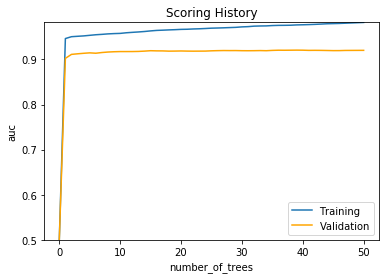

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Training ROC : {}".format(model_gbm.auc(train=True)))
print("Validation ROC : {}".format(model_gbm.auc(valid=True)))
model_gbm.plot(metric="auc")

### Inspect the output of the Deep Learning model

In [78]:
model_dl

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1591583829171_100


Status of Neuron Layers: predicting Arrest, 2-class classification, bernoulli distribution, CrossEntropy loss, 118,602 weights/biases, 1.4 MB, 59,400 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,389,Input,0,,,,,,,,,
1,,2,200,Rectifier,0,0,0,0.151559,0.344635,0,-0.0015909,0.0593178,0.0367452,0.0985978
2,,3,200,Rectifier,0,0,0,0.177265,0.253879,0,-0.0194072,0.074341,0.730123,0.215731
3,,4,2,Softmax,,0,0,0.0041837,0.00318427,0,0.0523895,0.370893,-8.62832e-05,0.00976468




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.0730763636210755
RMSE: 0.27032640200519725
LogLoss: 0.239419794081947
Mean Per-Class Error: 0.12673167314868006
AUC: 0.9524997040343407
AUCPR: 0.9193302366437442
Gini: 0.9049994080686814

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.32694990752675607: 


,,false,true,Error,Rate
0,false,3985.0,219.0,0.0521,(219.0/4204.0)
1,true,368.0,1368.0,0.212,(368.0/1736.0)
2,Total,4353.0,1587.0,0.0988,(587.0/5940.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.326950,0.823352,200.0
1,max f2,0.099555,0.849463,308.0
2,max f0point5,0.566520,0.888099,127.0
3,max accuracy,0.408491,0.904040,170.0
4,max precision,0.999956,1.000000,0.0
5,max recall,0.003026,1.000000,393.0
6,max specificity,0.999956,1.000000,0.0
7,max absolute_mcc,0.400469,0.761968,172.0
8,max min_per_class_accuracy,0.181999,0.871544,260.0
9,max mean_per_class_accuracy,0.190029,0.873268,257.0



Gains/Lift Table: Avg response rate: 29.23 %, avg score: 26.23 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010101,0.999995,3.421659,3.421659,1.000000,0.999996,1.000000,0.999996,0.034562,0.034562,242.165899,242.165899
1,,2,0.020034,0.999991,3.421659,3.421659,1.000000,0.999993,1.000000,0.999995,0.033986,0.068548,242.165899,242.165899
2,,3,0.030135,0.999988,3.421659,3.421659,1.000000,0.999990,1.000000,0.999993,0.034562,0.103111,242.165899,242.165899
3,,4,0.040067,0.999984,3.421659,3.421659,1.000000,0.999986,1.000000,0.999991,0.033986,0.137097,242.165899,242.165899
4,,5,0.050000,0.999978,3.421659,3.421659,1.000000,0.999981,1.000000,0.999989,0.033986,0.171083,242.165899,242.165899
5,,6,0.100000,0.999758,3.421659,3.421659,1.000000,0.999934,1.000000,0.999961,0.171083,0.342166,242.165899,242.165899
6,,7,0.150000,0.912663,3.364055,3.402458,0.983165,0.971311,0.994388,0.990411,0.168203,0.510369,236.405530,240.245776
7,,8,0.200000,0.646046,2.972350,3.294931,0.868687,0.801176,0.962963,0.943102,0.148618,0.658986,197.235023,229.493088
8,,9,0.300000,0.248626,1.664747,2.751536,0.486532,0.399783,0.804153,0.761996,0.166475,0.825461,66.474654,175.153610
9,,10,0.400000,0.123410,0.817972,2.268145,0.239057,0.177741,0.662879,0.615932,0.081797,0.907258,-18.202765,126.814516




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.0829206529038307
RMSE: 0.28795946399420647
LogLoss: 0.2859159775030495
Mean Per-Class Error: 0.15379187190483146
AUC: 0.9254995419482469
AUCPR: 0.8859463139114105
Gini: 0.8509990838964938

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.40999755017300576: 


,,false,true,Error,Rate
0,false,1317.0,65.0,0.047,(65.0/1382.0)
1,true,142.0,403.0,0.2606,(142.0/545.0)
2,Total,1459.0,468.0,0.1074,(207.0/1927.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.409998,0.795656,142.0
1,max f2,0.123548,0.818427,267.0
2,max f0point5,0.751571,0.871080,74.0
3,max accuracy,0.536189,0.895174,111.0
4,max precision,0.999973,1.000000,0.0
5,max recall,0.000900,1.000000,398.0
6,max specificity,0.999973,1.000000,0.0
7,max absolute_mcc,0.642284,0.733313,93.0
8,max min_per_class_accuracy,0.177064,0.840367,233.0
9,max mean_per_class_accuracy,0.409998,0.846208,142.0



Gains/Lift Table: Avg response rate: 28.28 %, avg score: 26.65 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010379,0.999995,3.535780,3.535780,1.000000,0.999997,1.000000,0.999997,0.036697,0.036697,253.577982,253.577982
1,,2,0.020239,0.999992,3.535780,3.535780,1.000000,0.999993,1.000000,0.999995,0.034862,0.071560,253.577982,253.577982
2,,3,0.030099,0.999989,3.535780,3.535780,1.000000,0.999991,1.000000,0.999994,0.034862,0.106422,253.577982,253.577982
3,,4,0.040477,0.999985,3.535780,3.535780,1.000000,0.999987,1.000000,0.999992,0.036697,0.143119,253.577982,253.577982
4,,5,0.050337,0.999980,3.535780,3.535780,1.000000,0.999982,1.000000,0.999990,0.034862,0.177982,253.577982,253.577982
5,,6,0.100156,0.999764,3.535780,3.535780,1.000000,0.999935,1.000000,0.999963,0.176147,0.354128,253.577982,253.577982
6,,7,0.149974,0.931834,3.388456,3.486842,0.958333,0.982751,0.986159,0.994245,0.168807,0.522936,238.845566,248.684169
7,,8,0.200311,0.653350,2.806753,3.315939,0.793814,0.817045,0.937824,0.949716,0.141284,0.664220,180.675305,231.593858
8,,9,0.299948,0.255860,1.270671,2.636542,0.359375,0.409287,0.745675,0.770196,0.126606,0.790826,27.067087,163.654170
9,,10,0.400104,0.128923,0.934325,2.210436,0.264249,0.183043,0.625162,0.623217,0.093578,0.884404,-6.567476,121.043563




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-06-07 21:25:08,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-06-07 21:25:11,3.294 sec,2490 obs/sec,1.0,1,5940.0,0.350552,0.487557,0.405892,...,0.849450,3.421659,0.152020,0.336785,0.453405,0.440805,0.898761,0.849806,3.53578,0.128697
2,,2020-06-07 21:25:18,10.596 sec,3878 obs/sec,6.0,6,35640.0,0.270326,0.239420,0.646705,...,0.919330,3.421659,0.098822,0.287959,0.285916,0.591190,0.925500,0.885946,3.53578,0.107421
3,,2020-06-07 21:25:23,15.175 sec,4478 obs/sec,10.0,10,59400.0,0.243692,0.193057,0.712893,...,0.951274,3.421659,0.073064,0.297970,0.329126,0.562272,0.918683,0.877725,3.53578,0.113648
4,,2020-06-07 21:25:23,15.696 sec,4472 obs/sec,10.0,10,59400.0,0.270326,0.239420,0.646705,...,0.919330,3.421659,0.098822,0.287959,0.285916,0.591190,0.925500,0.885946,3.53578,0.107421



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Domestic.false,1.000000,1.000000,0.004749
1,Primary_Type.NARCOTICS,0.953533,0.953533,0.004528
2,FBI_Code.18,0.914180,0.914180,0.004341
3,IUCR.0860,0.775141,0.775141,0.003681
4,Domestic.true,0.684342,0.684342,0.003250
5,IUCR.2820,0.672516,0.672516,0.003194
6,Location_Description.RESIDENCE,0.661819,0.661819,0.003143
7,FBI_Code.24,0.659539,0.659539,0.003132
8,IUCR.4625,0.658643,0.658643,0.003128
9,Primary_Type.BURGLARY,0.627297,0.627297,0.002979



See the whole table with table.as_data_frame()


### Now let us use the model to perform predictions on the Test Set

In [79]:
# Predict on the test set using the gbm model
predictions = model_gbm.predict(test)
predictions.show()

gbm prediction progress: |████████████████████████████████████████████████| 100%


predict,false,true
false,0.97645,0.0235503
true,0.0076369,0.992363
false,0.981789,0.0182115
false,0.763023,0.236977
false,0.98419,0.0158104
false,0.972806,0.0271941
false,0.988114,0.011886
false,0.972337,0.0276634
true,0.37516,0.62484
false,0.982908,0.0170918


### Here are some performance metrics

In [80]:
model_gbm.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.10104945261516891
RMSE: 0.3178827655208267
LogLoss: 0.3386339099290722
Mean Per-Class Error: 0.16609793418219487
AUC: 0.9067547277006736
AUCPR: 0.8635816869134246
Gini: 0.8135094554013471

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31293329785779844: 


,,false,true,Error,Rate
0,false,1252.0,117.0,0.0855,(117.0/1369.0)
1,true,151.0,461.0,0.2467,(151.0/612.0)
2,Total,1403.0,578.0,0.1353,(268.0/1981.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.312933,0.774790,184.0
1,max f2,0.087043,0.811473,314.0
2,max f0point5,0.842487,0.844972,66.0
3,max accuracy,0.407493,0.868248,153.0
4,max precision,0.992196,1.000000,0.0
5,max recall,0.008052,1.000000,398.0
6,max specificity,0.992196,1.000000,0.0
7,max absolute_mcc,0.407493,0.682132,153.0
8,max min_per_class_accuracy,0.208464,0.820307,238.0
9,max mean_per_class_accuracy,0.312933,0.833902,184.0



Gains/Lift Table: Avg response rate: 30.89 %, avg score: 29.62 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010096,0.990790,3.075082,3.075082,0.950000,0.991307,0.950000,0.991307,0.031046,0.031046,207.508170,207.508170
1,,2,0.020697,0.990306,3.236928,3.157979,1.000000,0.990497,0.975610,0.990892,0.034314,0.065359,223.692810,215.797864
2,,3,0.031802,0.990070,3.236928,3.185548,1.000000,0.990163,0.984127,0.990638,0.035948,0.101307,223.692810,218.554829
3,,4,0.040384,0.989893,3.236928,3.196467,1.000000,0.989973,0.987500,0.990496,0.027778,0.129085,223.692810,219.646650
4,,5,0.051489,0.989736,3.089795,3.173459,0.954545,0.989796,0.980392,0.990345,0.034314,0.163399,208.979501,217.345893
5,,6,0.100454,0.988673,3.203558,3.188130,0.989691,0.989294,0.984925,0.989833,0.156863,0.320261,220.355771,218.813019
6,,7,0.150429,0.968009,3.138839,3.171755,0.969697,0.983962,0.979866,0.987882,0.156863,0.477124,213.883937,217.175506
7,,8,0.200404,0.818610,2.615699,3.033091,0.808081,0.903140,0.937028,0.966750,0.130719,0.607843,161.569948,203.309132
8,,9,0.300353,0.299780,1.454983,2.507939,0.449495,0.503857,0.774790,0.812712,0.145425,0.753268,45.498283,150.793925
9,,10,0.400303,0.189366,0.964539,2.122576,0.297980,0.235028,0.655738,0.668473,0.096405,0.849673,-3.546082,112.257581


In [81]:
sqlContext.registerDataFrameAsTable(df_crimes, "df_crimes")
allCrimes = sqlContext.sql("""SELECT Primary_Type, count(*) as all_count FROM df_crimes GROUP BY Primary_Type""")
crimesWithArrest = sqlContext.sql("SELECT Primary_Type, count(*) as crime_count FROM chicagoCrime WHERE Arrest = 'true' GROUP BY Primary_Type")

sqlContext.registerDataFrameAsTable(crimesWithArrest, "crimesWithArrest")
sqlContext.registerDataFrameAsTable(allCrimes, "allCrimes")

crime_type = sqlContext.sql("Select a.Primary_Type as Crime_Type, a.crime_count, b.all_count \
FROM crimesWithArrest a \
JOIN allCrimes b \
ON a.Primary_Type = b.Primary_Type ")

crime_type.show(12)

+--------------------+-----------+---------+
|          Crime_Type|crime_count|all_count|
+--------------------+-----------+---------+
|OFFENSE INVOLVING...|          5|       93|
|            STALKING|          2|        8|
|PUBLIC PEACE VIOL...|         65|      100|
|            GAMBLING|          3|        3|
|   CRIMINAL TRESPASS|        206|      283|
|             ASSAULT|        165|      682|
|LIQUOR LAW VIOLATION|         12|       12|
| MOTOR VEHICLE THEFT|         17|      414|
|               THEFT|        306|     2034|
|             BATTERY|        432|     1851|
|             ROBBERY|         17|      357|
|            HOMICIDE|          7|       16|
+--------------------+-----------+---------+
only showing top 12 rows



In [84]:
#Copy Crime_type table from Spark to H2O
crime_typeHF = hc.asH2OFrame(crime_type)
# Create Additional columns Arrest_rate and Crime_propotion 
crime_typeHF["Arrest_rate"] = crime_typeHF["crime_count"]/crime_typeHF["all_count"]
crime_typeHF["Crime_proportion"] = crime_typeHF["all_count"]/crime_typeHF["all_count"].sum()
crime_typeHF["Crime_Type"] = crime_typeHF["Crime_Type"].asfactor()
# h2o.assign(crime_typeHF,crime_type)
crime_typeHF.frame_id = "Crime_type"
crime_typeHF

Crime_Type,crime_count,all_count,Arrest_rate,Crime_proportion
OFFENSE INVOLVING CHILDREN,5,93,0.0537634,0.00931584
STALKING,2,8,0.25,0.000801362
PUBLIC PEACE VIOLATION,65,100,0.65,0.010017
GAMBLING,3,3,1,0.000300511
CRIMINAL TRESPASS,206,283,0.727915,0.0283482
ASSAULT,165,682,0.241935,0.0683161
LIQUOR LAW VIOLATION,12,12,1,0.00120204
MOTOR VEHICLE THEFT,17,414,0.0410628,0.0414705
THEFT,306,2034,0.150442,0.203746
BATTERY,432,1851,0.233387,0.185415


### This code snippet will plot the figure shown below in H2O Flow (2.0.2)
plot (g) -> g(<br>
  g.rect(<br>
    g.position "Crime_Type", "Arrest_rate"<br>
    g.fillColor g.value 'blue'<br>
    g.fillOpacity g.value 0.75<br>
  )<br>
  g.rect(<br>
    g.position "Crime_Type", "Crime_proportion"<br>
    g.fillColor g.value 'red'<br>
    g.fillOpacity g.value 0.65<br>
  )<br>
  g.from inspect "data", getFrame "Crime_type"<br>
)<br>
![title](demo_plot.png)